## Introduction to convolutional Neural Network and computer vision

In [2]:
import tensorflow as tf 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [6]:
!dir pizza_steak

 Volume in drive C has no label.
 Volume Serial Number is 96A9-CC6E

 Directory of C:\Users\HP\Desktop\complete machine learning\TENSORFLOW\pizza_steak

02/26/2026  12:42 AM    <DIR>          .
02/26/2026  12:42 AM    <DIR>          ..
08/20/2020  05:21 AM    <DIR>          test
08/20/2020  01:31 AM    <DIR>          train
               0 File(s)              0 bytes
               4 Dir(s)  76,478,943,232 bytes free


In [17]:
!dir pizza_steak\train

 Volume in drive C has no label.
 Volume Serial Number is 96A9-CC6E

 Directory of C:\Users\HP\Desktop\complete machine learning\TENSORFLOW\pizza_steak\train

08/20/2020  01:31 AM    <DIR>          .
08/20/2020  01:31 AM    <DIR>          ..
08/20/2020  01:31 AM    <DIR>          pizza
08/20/2020  12:13 AM    <DIR>          steak
               0 File(s)              0 bytes
               4 Dir(s)  76,473,532,416 bytes free


In [18]:
!dir pizza_steak\train\steak

 Volume in drive C has no label.
 Volume Serial Number is 96A9-CC6E

 Directory of C:\Users\HP\Desktop\complete machine learning\TENSORFLOW\pizza_steak\train\steak

08/20/2020  12:13 AM    <DIR>          .
08/20/2020  12:13 AM    <DIR>          ..
09/20/2019  01:06 PM            36,185 1000205.jpg
09/20/2019  01:06 PM            34,497 100135.jpg
09/20/2019  01:06 PM           116,802 101312.jpg
09/20/2019  01:06 PM            56,754 1021458.jpg
09/20/2019  01:06 PM            34,143 1032846.jpg
09/20/2019  01:06 PM            24,688 10380.jpg
09/20/2019  01:06 PM            37,134 1049459.jpg
09/20/2019  01:06 PM            49,841 1053665.jpg
09/20/2019  01:06 PM            59,983 1068516.jpg
09/20/2019  01:06 PM            28,996 1068975.jpg
09/20/2019  01:06 PM            29,525 1081258.jpg
09/20/2019  01:06 PM            49,577 1090122.jpg
09/20/2019  01:06 PM            59,976 1093966.jpg
09/20/2019  01:06 PM            60,253 1098844.jpg
09/20/2019  01:06 PM            69,843 110

In [19]:
## walk through pizza_stake directory and list the number of file 

import os 

for dirpath, dirnames, filenames in os.walk('pizza_steak'):
    print(f'there are {len(dirnames)}, directories and {len(filenames)} in images in "{dirpath}".')

there are 2, directories and 0 in images in "pizza_steak".
there are 2, directories and 0 in images in "pizza_steak\test".
there are 0, directories and 250 in images in "pizza_steak\test\pizza".
there are 0, directories and 250 in images in "pizza_steak\test\steak".
there are 2, directories and 0 in images in "pizza_steak\train".
there are 0, directories and 750 in images in "pizza_steak\train\pizza".
there are 0, directories and 750 in images in "pizza_steak\train\steak".


In [20]:
import pathlib 

data_dir = pathlib.Path('pizza_steak/train')
class_name = np.array(sorted([item.name for item in data_dir.glob('*')]))
class_name

array(['pizza', 'steak'], dtype='<U5')

In [29]:
import matplotlib.image as mpimg 
import random

def view_random_image(target_dir, target_class): 
    # Setup the target directory 
    target_folder = target_dir+target_class

    # get a random image path 
    random_image = random.sample(os.listdir(target_folder), 1)

    # Read in the image and plot
    img = mpimg.imread(target_folder + '/' + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis('off')
    plt.show()

    print('image shape', img.shape)

    return img

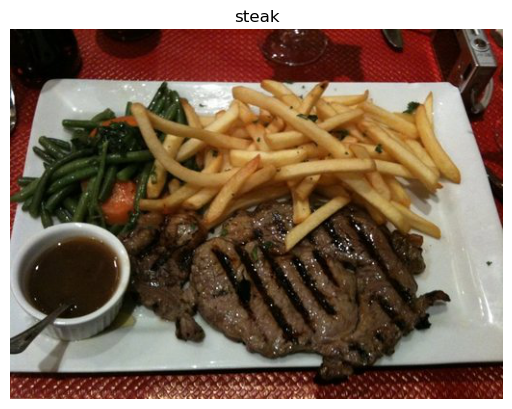

image shape (384, 512, 3)


In [71]:
## View random image 

img = view_random_image('pizza_steak/train/', 'steak')

In [72]:
img

array([[[  9,   5,   2],
        [  6,   2,   0],
        [  5,   1,   0],
        ...,
        [156, 156, 128],
        [145, 145, 119],
        [152, 152, 128]],

       [[  9,   5,   2],
        [  8,   4,   1],
        [  8,   4,   1],
        ...,
        [148, 144, 117],
        [140, 136, 111],
        [150, 144, 122]],

       [[  8,   4,   1],
        [ 10,   6,   3],
        [ 10,   6,   3],
        ...,
        [141, 131, 106],
        [142, 129, 110],
        [151, 135, 119]],

       ...,

       [[112,  42,  32],
        [ 95,  25,  17],
        [108,  40,  31],
        ...,
        [126,  59,  43],
        [130,  63,  46],
        [105,  38,  21]],

       [[135,  65,  57],
        [116,  48,  39],
        [122,  55,  46],
        ...,
        [ 95,  28,  11],
        [ 99,  32,  15],
        [ 93,  26,   9]],

       [[154,  86,  77],
        [155,  88,  79],
        [142,  78,  69],
        ...,
        [ 89,  24,   6],
        [ 70,   5,   0],
        [ 90,  25,   7]]

In [73]:
tf.constant(img)

<tf.Tensor: shape=(384, 512, 3), dtype=uint8, numpy=
array([[[  9,   5,   2],
        [  6,   2,   0],
        [  5,   1,   0],
        ...,
        [156, 156, 128],
        [145, 145, 119],
        [152, 152, 128]],

       [[  9,   5,   2],
        [  8,   4,   1],
        [  8,   4,   1],
        ...,
        [148, 144, 117],
        [140, 136, 111],
        [150, 144, 122]],

       [[  8,   4,   1],
        [ 10,   6,   3],
        [ 10,   6,   3],
        ...,
        [141, 131, 106],
        [142, 129, 110],
        [151, 135, 119]],

       ...,

       [[112,  42,  32],
        [ 95,  25,  17],
        [108,  40,  31],
        ...,
        [126,  59,  43],
        [130,  63,  46],
        [105,  38,  21]],

       [[135,  65,  57],
        [116,  48,  39],
        [122,  55,  46],
        ...,
        [ 95,  28,  11],
        [ 99,  32,  15],
        [ 93,  26,   9]],

       [[154,  86,  77],
        [155,  88,  79],
        [142,  78,  69],
        ...,
        [ 89,  24,   

In [78]:
imger = (img / 127.5) - 1.0

In [79]:
imger

array([[[-1.0072895 , -1.00753556, -1.00772011],
        [-1.00747405, -1.00772011, -1.00784314],
        [-1.00753556, -1.00778162, -1.00784314],
        ...,
        [-0.99824683, -0.99824683, -0.99996924],
        [-0.99892349, -0.99892349, -1.00052288],
        [-0.99849289, -0.99849289, -0.99996924]],

       [[-1.0072895 , -1.00753556, -1.00772011],
        [-1.00735102, -1.00759708, -1.00778162],
        [-1.00735102, -1.00759708, -1.00778162],
        ...,
        [-0.99873895, -0.99898501, -1.00064591],
        [-0.99923106, -0.99947712, -1.00101499],
        [-0.99861592, -0.99898501, -1.00033833]],

       [[-1.00735102, -1.00759708, -1.00778162],
        [-1.00722799, -1.00747405, -1.00765859],
        [-1.00722799, -1.00747405, -1.00765859],
        ...,
        [-0.99916955, -0.9997847 , -1.00132257],
        [-0.99910804, -0.99990773, -1.00107651],
        [-0.9985544 , -0.99953864, -1.00052288]],

       ...,

       [[-1.00095348, -1.00525952, -1.00587466],
        [-1

### Build our neural network

In [86]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

# Preposessing our image 
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# setup path to our dir 
train_dir = 'pizza_steak/train/'
test_dir = 'pizza_steak/test/'

## Import data from dir and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                              batch_size=32,
                                              target_size=(224, 224), 
                                              class_mode='binary', seed=42) 

valid_data = valid_datagen.flow_from_directory(directory=test_dir, 
                                              batch_size=32,
                                              target_size=(224, 224),
                                              class_mode='binary', 
                                              seed=42)


## Building a CNN model 

model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                          kernel_size=3,
                          activation='relu',
                          input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation='relu'), 
    tf.keras.layers.MaxPool2D(pool_size=2,
                             padding='valid'), 
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'), 
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_1.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer= tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics = [tf.keras.metrics.Accuracy()]
)

history_1 = model_1.fit(train_data, epochs=5, 
                        steps_per_epoch=len(train_data), 
                        validation_data=valid_data, 
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 17s 317ms/step - accuracy: 0.0000e+00 - loss: 0.5745 - val_accuracy: 0.0000e+00 - val_loss: 0.4566
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 14s 306ms/step - accuracy: 0.0000e+00 - loss: 0.4420 - val_accuracy: 0.0000e+00 - val_loss: 0.3588
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 15s 314ms/step - accuracy: 0.0000e+00 - loss: 0.4289 - val_accuracy: 0.0000e+00 - val_loss: 0.3836
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 14s 303ms/step - accuracy: 0.0000e+00 - loss: 0.4136 - val_accuracy: 0.0000e+00 - val_loss: 0.3694
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 14s 306ms/step - accuracy: 0.0000e+00 - loss: 0.3557 - val_accuracy: 0.0000e+00 - val_loss: 0.3910


In [87]:
model_1.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)              │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 220, 220, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 110, 110, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 108, 108, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 106, 106, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 104, 104, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 52, 52, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 27040)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │        27,041 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 92,885 (362.84 KB)

 Trainable params: 30,961 (120.94 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 61,924 (241.89 KB)

In [88]:
# Preposessing our image 
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# setup path to our dir 
train_dir = 'pizza_steak/train/'
test_dir = 'pizza_steak/test/'

## Import data from dir and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                              batch_size=32,
                                              target_size=(224, 224), 
                                              class_mode='binary', seed=42) 

valid_data = valid_datagen.flow_from_directory(directory=test_dir, 
                                              batch_size=32,
                                              target_size=(224, 224),
                                              class_mode='binary', 
                                              seed=42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                          kernel_size=3,
                          activation='relu',
                          input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation='relu'), 
    tf.keras.layers.MaxPool2D(pool_size=2,
                             padding='valid'), 
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'), 
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(1, activation='sigmoid')
])



Found 1500 images belonging to 2 classes.
Found 501 images belonging to 2 classes.
